# Present Values

We now move from data analysis to theoretical (mathematical) models and we will see how we can use Python to help us solve these models.

## Overview

This lecture describes the  **present value model** that is a starting point
of much of asset pricing theory.

Asset pricing theory is a component of theories about many economic decisions including

- consumption  
- labor supply  
- education choice  
- demand for money  


In asset pricing theory, and in economic dynamics more generally, a basic topic is the relationship
among different __time series__.

A **time series** is a **sequence** indexed by time.

In this lecture, we’ll represent  a sequence as a vector.

So our analysis will typically boil down to studying relationships among vectors.

Our main  tools in this lecture will be

- matrix multiplication,  and  
- matrix inversion.  


We’ll use the calculations described here in  subsequent lectures as well.


## Recap of matrix multiplication (do in class):

Assume you have the following matrices and vectors:

$$A = \begin{pmatrix} 1 & 2 & 3 \cr 4 & 5 & 6\end{pmatrix}$$   size 2x3, to mult must be by 3x..., result is 2x...

$$B = \begin{pmatrix} 0 & 3 & 1 \cr 2 & 3 & 4\end{pmatrix}$$

$$a = \begin{pmatrix} 1 \cr 2 \cr 3 \end{pmatrix}$$

$$b = \begin{pmatrix}  4 \cr 5 \cr 6\end{pmatrix}$$

Compute $Aa$, $AB'$, and $b'a$.

$B'$ is 3x2 

            (0 2

            3  3
            
            4  4)

$b'$ is (456)

$Aa$ = 2x1

(14

  32 )



$AB'$ = 2x2 

(9  20

21 47 )

$b'A$ = 1x1

(32)

In [26]:
#in python (solutions canvas)
import numpy as np
A=np.array([[1,2,3],[4,5,6]])
B=np.array([[0,3,1],[2,3,4]])
a=np.array([[1],[2],[3]])  #for column vector need to bracket every value 
b=np.array([[4],[5],[6]])

A@a

array([[14],
       [32]])

In [21]:
A@B.T #traversal of B

array([[ 9, 20],
       [21, 47]])

In [28]:
b.T@a

array([[32]])

## Analysis

We want to determine the price of an asset. 

Let

- $ \{d_t\}_{t=0}^T $ be a sequence of dividends or “payouts”  
- $ \{p_t\}_{t=0}^T $ be a sequence of prices of a claim on the continuation of
  the asset’s payout  stream from date $ t $ on, namely, $ \{d_s\}_{s=t}^T $  
- $ \delta  \in (0,1) $ be a one-period “discount factor”  
- $ p_{T+1}^* $ be a terminal price of the asset at time $ T+1 $  


We  assume that the dividend stream $ \{d_t\}_{t=0}^T $ and the terminal price
$ p_{T+1}^* $ are both exogenous.

This means that they are determined outside the model.

Assume the sequence of asset pricing equations


<a id='equation-eq-euler1'></a>
$$
p_t = d_t + \delta p_{t+1}, \quad t = 0, 1, \ldots , T \tag{1}
$$

We say equation**s**, plural, because there are $ T+1 $ equations, one for each $ t =0, 1, \ldots, T $.

Equations [(1)](#equation-eq-euler1) assert that the price paid to purchase  the asset at time $ t $  equals the payout $ d_t $  plus the price at time  $ t+1 $ multiplied by a time discount factor $ \delta $.

Discounting tomorrow’s price  by multiplying it by  $ \delta $ accounts for the “value of waiting one period”.

We want to solve the system of $ T+1 $ equations [(1)](#equation-eq-euler1) for the asset price sequence  $ \{p_t\}_{t=0}^T $ as a function of the dividend sequence $ \{d_t\}_{t=0}^T $ and the exogenous terminal
price  $ p_{T+1}^* $.

A system of equations like [(1)](#equation-eq-euler1) is an example of a linear  **difference equation**.

There are powerful mathematical  methods available for solving such systems and they are well worth
studying in their own right, being the foundation for the analysis of many interesting economic models.

In this lecture, we’ll  solve system [(1)](#equation-eq-euler1) using matrix multiplication and matrix inversion.

We will use the following imports

In [31]:
import numpy as np
import matplotlib.pyplot as plt

## Representing sequences as vectors

The equations in system [(1)](#equation-eq-euler1) can be arranged as follows:


<a id='equation-eq-euler-stack'></a>
$$
\begin{aligned}
    p_0 & = d_0 + \delta p_1 \\
    p_1 & = d_1 + \delta p_2 \\
    \vdots \\
    p_{T-1} & = d_{T-1} + \delta p_T \\
    p_T & = d_T + \delta p^*_{T+1}
\end{aligned} \tag{2}
$$

Write the system [(2)](#equation-eq-euler-stack) of $ T+1 $ asset pricing  equations as the single matrix equation


<a id='equation-eq-pvpieq'></a>
$$
\begin{bmatrix} 1 & -\delta & 0 & 0 & \cdots & 0 & 0 \cr
                    0 & 1 & -\delta & 0 & \cdots & 0 & 0 \cr
                    0 & 0 & 1 & -\delta & \cdots & 0 & 0 \cr
                    \vdots & \vdots & \vdots & \vdots & \vdots & 0 & 0 \cr
                    0 & 0 & 0 & 0 & \cdots & 1 & -\delta \cr
                    0 & 0 & 0 & 0 & \cdots & 0 & 1 \end{bmatrix}
    \begin{bmatrix} p_0 \cr p_1 \cr p_2 \cr \vdots \cr p_{T-1} \cr p_T 
    \end{bmatrix} 
    =  \begin{bmatrix}  
    d_0 \cr d_1 \cr d_2 \cr \vdots \cr d_{T-1} \cr d_T
    \end{bmatrix}
    + \begin{bmatrix} 
    0 \cr 0 \cr 0 \cr \vdots \cr 0 \cr \delta p_{T+1}^*
    \end{bmatrix} \tag{3}
$$

### Exercise to do in class

Carry out the matrix multiplication in [(3)](#equation-eq-pvpieq) by hand and confirm that you
recover the equations in [(2)](#equation-eq-euler-stack).


$P_0 -$$\delta$$P_t=d_0$

$P_0=d_0+$$\delta$$P_t$

$P_T=d_T+$$\delta$$p^*_T+1$

In vector-matrix notation, we can write  system [(3)](#equation-eq-pvpieq) as


<a id='equation-eq-apdb'></a>
$$
A p = d + b \tag{4}
$$

Here $ A $ is the matrix on the left side of equation [(3)](#equation-eq-pvpieq), while

$$
p = 
    \begin{bmatrix}
        p_0 \\
        p_1 \\
        \vdots \\
        p_T
    \end{bmatrix},
    \quad
    d = 
    \begin{bmatrix}
        d_0 \\
        d_1 \\
        \vdots \\
        d_T
    \end{bmatrix},
    \quad \text{and} \quad
    b = 
    \begin{bmatrix}
        0 \\
        0 \\
        \vdots \\
        \delta p^*_{T+1}
    \end{bmatrix}
$$

The solution for the vector of  prices is


<a id='equation-eq-apdb-sol'></a>
$$
p = A^{-1}(d + b) \tag{5}
$$

For example, suppose that  the dividend stream is

$$
d_{t+1} = 1.05 d_t, \quad t = 0, 1, \ldots , T-1.
$$

Let’s write Python code to compute and plot the dividend stream.

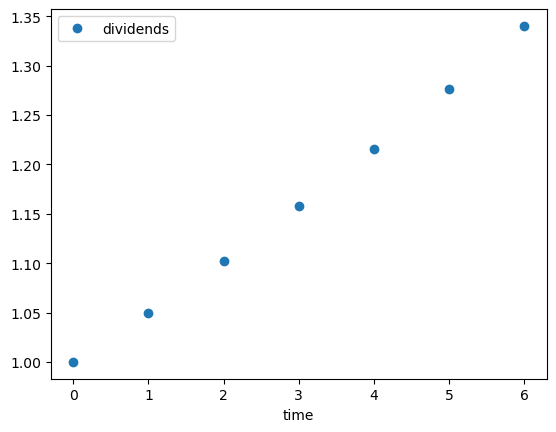

In [58]:
T = 6
current_d = 1.0
d = []
for t in range(T+1): #for loop and append current_d to d list and update current div by multiply
    d.append(current_d)
    current_d = current_d * 1.05 

fig, ax = plt.subplots()
ax.plot(d, 'o', label='dividends')
ax.legend()
ax.set_xlabel('time')
plt.show() #dividends inc over time bc multiplying ,,, growing exponentially for 6 periods 

Now let’s compute and plot the asset price.

We set $ \delta $ and $ p_{T+1}^* $ to

In [72]:
δ = 0.99
p_star = 10.0 #at end someone pays you $10

Let’s build the matrix $ A $

In [75]:
A = np.zeros((T+1, T+1)) #start with an empty array 
for i in range(T+1): #loop through rows
    for j in range(T+1): #loop through columns 
        if i == j:
            A[i, j] = 1 #fill diagonal with 1 
            if j < T:
                A[i, j+1] = -δ #minus delta right next to the diagonal to the right (j+1) 
#rest stays 0s

Let’s inspect $ A $

In [78]:
A

array([[ 1.  , -0.99,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  , -0.99,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  1.  , -0.99,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  1.  , -0.99,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  1.  , -0.99,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  , -0.99],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ]])

Now let’s solve for prices using [(5)](#equation-eq-apdb-sol).

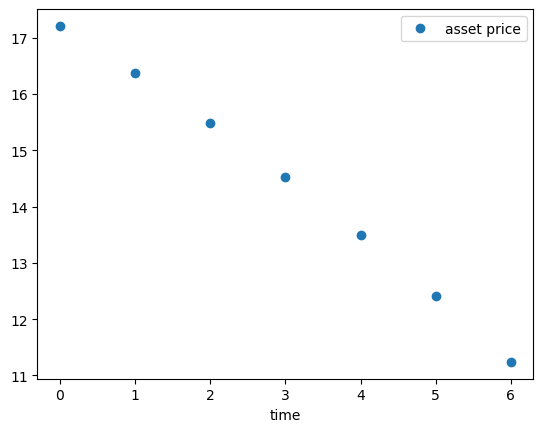

In [86]:
b = np.zeros(T+1)
b[-1] = δ * p_star #last entry is nonzero- this equation 
p = np.linalg.solve(A, d + b) # Another way to solve this equation would be: p = np.linalg.inv(A)@(d+b) , get inverse of matrix A 
#the solve method is much faster than using .inv 
fig, ax = plt.subplots()
ax.plot(p, 'o', label='asset price')
ax.legend()
ax.set_xlabel('time')
plt.show()
#in last period get divident+deltaxp*,, price higher than 9.9 
#changing price or dividend process changes the shape of the plot below 

In [90]:
p2 = np.linalg.inv(A)@(d+b)
p - p2 
#almost zero differences btwn the .inv and solve methods

array([ 3.55271368e-15,  0.00000000e+00,  1.77635684e-15,  0.00000000e+00,
        0.00000000e+00, -1.77635684e-15,  0.00000000e+00])

Now let’s consider  a cyclically growing dividend sequence:

$$
d_{t+1} = 1.01 d_t + 0.1 \sin t, \quad t = 0, 1, \ldots , T-1.
$$

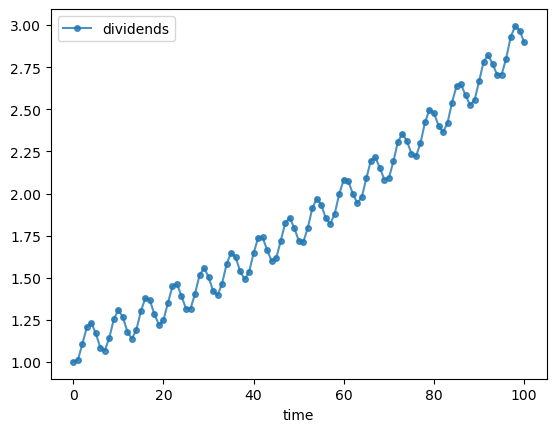

In [95]:
T = 100
current_d = 1.0
d = []
for t in range(T+1):
    d.append(current_d)
    current_d = current_d * 1.01 + 0.1 * np.sin(t)

fig, ax = plt.subplots()
ax.plot(d, 'o-', ms=4, alpha=0.8, label='dividends')
ax.legend()
ax.set_xlabel('time')
plt.show()
#still exponentially inc but with fluctuations 

### Exercise to do in class

Compute the corresponding asset price sequence when $ p^*_{T+1} = 0 $ and $ \delta
= 0.98 $.

In [137]:
#change inputs
δ=.98
p_star=0 
T=100

#amatrix 
A = np.zeros((T+1, T+1)) #start with an empty array 
for i in range(T+1): #loop through rows
    for j in range(T+1): #loop through columns 
        if i == j:
            A[i, j] = 1 #fill diagonal with 1 
            if j < T:
                A[i, j+1] = -δ
A

array([[ 1.  , -0.98,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  , -0.98, ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  1.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  1.  , -0.98,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  1.  , -0.98],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  1.  ]])

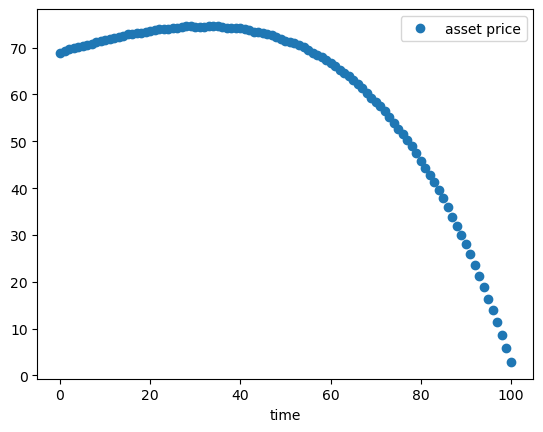

In [139]:
#pricing 
b = np.zeros(T+1)
b[-1] = δ * p_star #last entry is nonzero- this equation 
p = np.linalg.solve(A, d + b) # Another way to solve this equation would be: p = np.linalg.inv(A)@(d+b) , get inverse of matrix A 
#the solve method is much faster than using .inv 
fig, ax = plt.subplots()
ax.plot(p, 'o', label='asset price')
ax.legend()
ax.set_xlabel('time')
plt.show()

final price is 0, at first discount small, as get closer to fnial price it dominates and discounts heavily to reach 0 in last period 

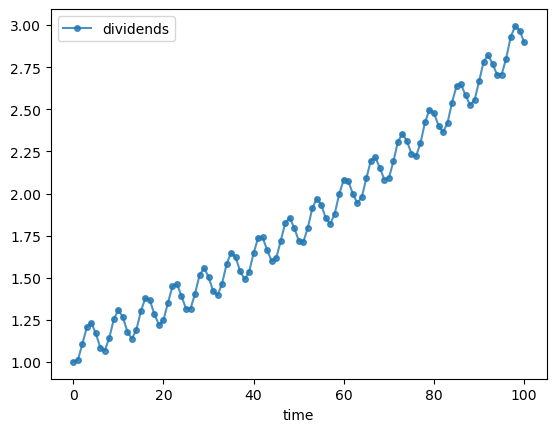

In [142]:
#div process
T = 100
current_d = 1.0
d = []
for t in range(T+1):
    d.append(current_d)
    current_d = current_d * 1.01 + 0.1 * np.sin(t)
fig, ax = plt.subplots()
ax.plot(d, 'o-', ms=4, alpha=0.8, label='dividends')
ax.legend()
ax.set_xlabel('time')
plt.show()

## Analytical expressions

By the [inverse matrix theorem](https://en.wikipedia.org/wiki/Invertible_matrix), a matrix $ B $ is the inverse of $ A $ whenever $ A B $ is the identity.

It can be verified that the  inverse of the matrix $ A $ in [(3)](#equation-eq-pvpieq) is


<a id='equation-eq-ainv'></a>
$$
A^{-1} = 
    \begin{bmatrix}
        1 & \delta & \delta^2 & \cdots & \delta^{T-1} & \delta^T \cr
        0 & 1 & \delta & \cdots & \delta^{T-2} & \delta^{T-1} \cr
        \vdots & \vdots & \vdots & \cdots & \vdots & \vdots \cr
        0 & 0 & 0 & \cdots & 1  & \delta \cr
        0 & 0 & 0 & \cdots & 0 & 1 \cr
    \end{bmatrix} \tag{6}
$$

The identity matrix is a square matrix that has 1s on the diagonal and 0s everywhere else. It's the matrix analogue of the number 1 (when you multiply any matrix or vector with its associated identity matrix, you get back the intial matrix or vector).

In [145]:
Ainv= np.linalg.inv(A) #for example 

### Exercise to do in class

Check that $ A A^{-1} $ is equal to the identity matrix.


In [148]:
A

array([[ 1.  , -0.98,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  , -0.98, ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  1.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  1.  , -0.98,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  1.  , -0.98],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  1.  ]])

In [150]:
Ainv

array([[1.        , 0.98      , 0.9604    , ..., 0.13808783, 0.13532608,
        0.13261956],
       [0.        , 1.        , 0.98      , ..., 0.14090595, 0.13808783,
        0.13532608],
       [0.        , 0.        , 1.        , ..., 0.14378158, 0.14090595,
        0.13808783],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.98      ,
        0.9604    ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.98      ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [154]:
A@Ainv #check solutions lol this is not correct 

array([[ 1.00000000e+00,  0.00000000e+00, -4.47641924e-17, ...,
         4.72343859e-18,  1.30000514e-17, -7.58813319e-18],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -6.88282169e-18,  4.72343859e-18,  1.30000514e-17],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         2.05108646e-18, -6.88282169e-18,  4.72343859e-18],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00, -4.47641924e-17],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

identity matrix has 1 on diagonals, 0 everywhere else

If we use the expression [(6)](#equation-eq-ainv) in [(5)](#equation-eq-apdb-sol) and perform the indicated matrix multiplication, we shall find  that

using Ainv(d+b)

<a id='equation-eq-ptpveq'></a>
$$
p_t =  \sum_{s=t}^T \delta^{s-t} d_s +  \delta^{T+1-t} p_{T+1}^* \tag{7}
$$

(Another way to arrive at this expression is to iterate forward on the initial asset pricing equation.)

Pricing formula [(7)](#equation-eq-ptpveq) asserts that  two components sum to the asset price
$ p_t $:

- a **fundamental component** $ \sum_{s=t}^T \delta^{s-t} d_s $ that equals the **discounted present value** of prospective dividends  
- a **bubble component** $ \delta^{T+1-t} p_{T+1}^* $  


The fundamental component is pinned down by the discount factor $ \delta $ and the
payout of the asset (in this case,  dividends).

The bubble component is the part of the price that is not pinned down by
fundamentals.

It is sometimes convenient to rewrite the bubble component as

$$
c \delta^{-t}
$$

where

$$
c \equiv \delta^{T+1}p_{T+1}^*
$$

iterating forward to find this solution:

take P1 and plug in for the Pt in the P0 equation,,, like finding div using next price 

keep iterating forward until 

$d_0+$$\delta$$d_1+$$\delta$$^2(d_2+$$\delta$$p_3)$+....

=$sumation$$\delta$$^sd_s + $$\delta$$^(T+1)p^*_(T+1)$

aka answer above 

## More about bubbles

For now, let’s focus on  the special case of an asset that   never pays dividends, in which case

$$
\begin{bmatrix}  
d_0 \cr d_1 \cr d_2 \cr \vdots \cr d_{T-1} \cr d_T
\end{bmatrix} = 
\begin{bmatrix}  
0 \cr 0 \cr 0 \cr \vdots \cr 0 \cr 0
\end{bmatrix}
$$

In this case  system [(1)](#equation-eq-euler1) of our $ T+1 $ asset pricing  equations takes the
form of the single matrix equation


<a id='equation-eq-pieq2'></a>
$$
\begin{bmatrix} 1 & -\delta & 0 & 0 & \cdots & 0 & 0 \cr
                0 & 1 & -\delta & 0 & \cdots & 0 & 0 \cr
                0 & 0 & 1 & -\delta & \cdots & 0 & 0 \cr
                \vdots & \vdots & \vdots & \vdots & \vdots & 0 & 0 \cr
                0 & 0 & 0 & 0 & \cdots & 1 & -\delta \cr
                0 & 0 & 0 & 0 & \cdots & 0 & 1 \end{bmatrix}
\begin{bmatrix} p_0 \cr p_1 \cr p_2 \cr \vdots \cr p_{T-1} \cr p_T 
\end{bmatrix}  =
\begin{bmatrix} 
0 \cr 0 \cr 0 \cr \vdots \cr 0 \cr \delta p_{T+1}^*
\end{bmatrix} \tag{8}
$$

Evidently, if $ p_{T+1}^* = 0 $, a price vector $ p $ of all entries zero
solves this equation and the only the **fundamental** component of our pricing
formula [(7)](#equation-eq-ptpveq) is present.

But let’s activate the **bubble**  component by setting


<a id='equation-eq-eqbubbleterm'></a>
$$
p_{T+1}^* = c \delta^{-(T+1)} \tag{9}
$$

for some positive constant $ c $.

In this case,  when we multiply both sides of [(8)](#equation-eq-pieq2) by
the matrix $ A^{-1} $ presented in equation [(6)](#equation-eq-ainv), we
find that


<a id='equation-eq-bubble'></a>
$$
p_t = c \delta^{-t} \tag{10}
$$

so $$p_0 < p_1 $$ because$$ \delta<1$$

## Gross rate of return

Define the gross rate of return on holding the asset from period $ t $ to period $ t+1 $
as


<a id='equation-eq-rateofreturn'></a>
$$
R_t = \frac{p_{t+1}}{p_t} \tag{11}
$$

Substituting equation [(10)](#equation-eq-bubble) into equation [(11)](#equation-eq-rateofreturn) confirms that an asset whose  sole source of value is a bubble  earns a  gross rate of return

$$
R_t = \delta^{-1} > 1 , t = 0, 1, \ldots, T
$$